In [1]:
import numpy as np
import math
from osgeo import gdal, ogr, osr, gdal_array
import os
import random
import rasterio

import matplotlib.pyplot as plt

In [40]:
# Working directory looks like this:
#
# surfaces
# ├───clear
# │       hemicylinder_clear.tif
# │       hemisphere_clear.tif
# │       paraboloid_clear.tif
# │
# ├───filtered
# │       hemicylinder_noisy_filtered.tif
# │       hemisphere_noisy_filtered.tif
# │       paraboloid_noisy_filtered.tif
# │
# └───noisy
#         hemicylinder_noisy.tif
#         hemicylinder_noisy.tif
#         paraboloid_noisy.tif

In [20]:
R = 75

arr1 = np.zeros((2*R+1, 2*R+1), dtype = 'float')
nrows = arr1.shape[0]
ncols = arr1.shape[1]
#arr1

In [21]:
ncols

151

In [22]:
#hemisphere
for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(-(float(x)-R)**2 - (float(y)-R)**2 + R**2)
            arr1[x][y] = z
        except ValueError:
            pass

arr1
#print(np.array_str(arr1, precision=1))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
print(np.max(arr1), np.min(arr1))

75.0 0.0


In [24]:
arr1[0][0]

arr2 = np.copy(arr1)

In [25]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_k = arr1 + arr_n * 2
arr_k

array([[ 2.65687688,  1.47468933, -0.65460547, ...,  4.60451086,
         0.79114098, -2.66136167],
       [-1.2239391 ,  0.57938167, -1.92318445, ...,  0.96600384,
         3.13592619, -0.80667073],
       [ 3.26418907,  0.70696028,  1.36186618, ...,  0.28180369,
        -0.26442375,  2.09956458],
       ...,
       [ 4.26681675,  1.33366038, -1.07493878, ...,  0.78811492,
        -2.23639856, -0.45272925],
       [ 0.62356537, -2.58904515,  0.93464688, ..., -2.43862167,
        -3.30490893,  4.46317665],
       [ 3.53955127,  0.45180285, -1.91466815, ..., -2.97076261,
        -1.75440735, -1.80799336]])

In [26]:
print(np.max(arr1), np.min(arr1))
print(np.max(arr_n), np.min(arr_n))
print(np.max(arr_k), np.min(arr_k))

75.0 0.0
3.9927887710415058 -3.993446362135262
81.19447913896502 -7.986892724270524


In [9]:
#fig, ax = plt.subplots(1, 3)
#ax[0].contour(arr1)
#ax[1].contour(arr_n)
#ax[2].contour(arr_k)
#plt.show()

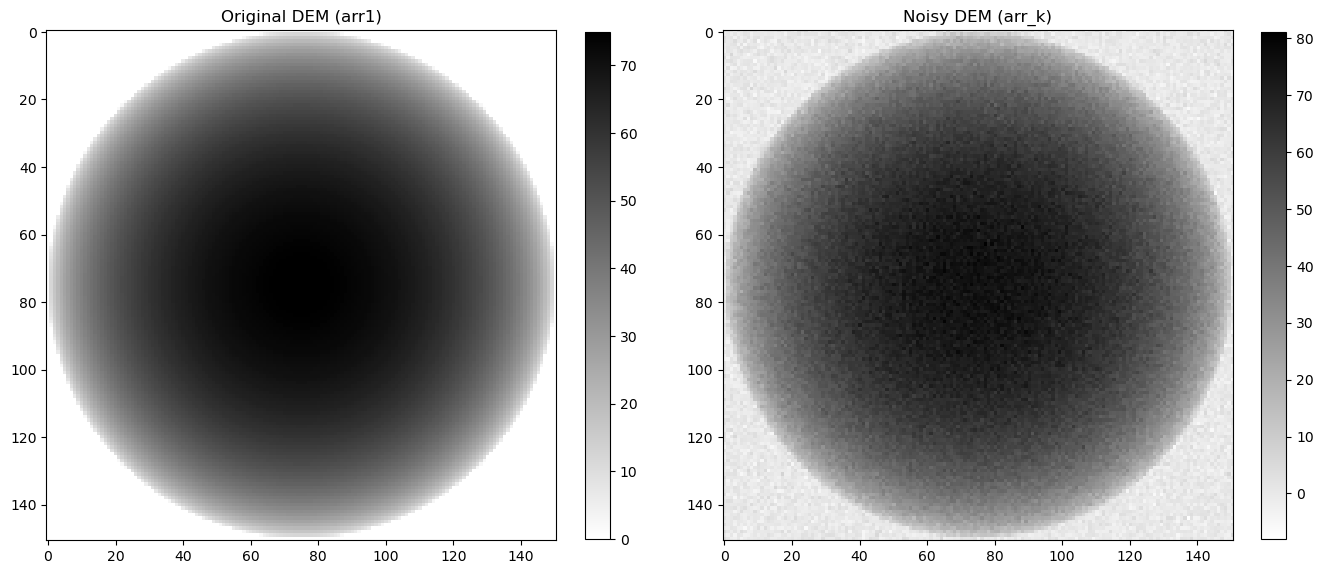

In [27]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM (arr1)')
plt.imshow(arr1, cmap='binary')
plt.colorbar(fraction=0.045)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM (arr_k)')
plt.imshow(arr_k, cmap='binary')
plt.colorbar(fraction=0.045)
plt.show()

In [28]:
#difference (clear-noisy)
np.subtract(arr1, arr_k)

array([[-2.65687688, -1.47468933,  0.65460547, ..., -4.60451086,
        -0.79114098,  2.66136167],
       [ 1.2239391 , -0.57938167,  1.92318445, ..., -0.96600384,
        -3.13592619,  0.80667073],
       [-3.26418907, -0.70696028, -1.36186618, ..., -0.28180369,
         0.26442375, -2.09956458],
       ...,
       [-4.26681675, -1.33366038,  1.07493878, ..., -0.78811492,
         2.23639856,  0.45272925],
       [-0.62356537,  2.58904515, -0.93464688, ...,  2.43862167,
         3.30490893, -4.46317665],
       [-3.53955127, -0.45180285,  1.91466815, ...,  2.97076261,
         1.75440735,  1.80799336]])

In [29]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run in administrator mode to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr1

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\hemisphere_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
data = arr_k
    
with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\hemisphere_noisy.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)

In [33]:
#hemicylinder
R = 30

arr_c = np.zeros((int(3*R), int(2*R)+1), dtype = 'float')
nrows = arr_c.shape[0]
ncols = arr_c.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(R**2 - (float(y)-R)**2)
            arr_c[x][y] = z
        except ValueError:
            pass

#arr_c

In [34]:
np.max(arr_c)

30.0

In [35]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_cn = arr_c + arr_n
#arr_cn

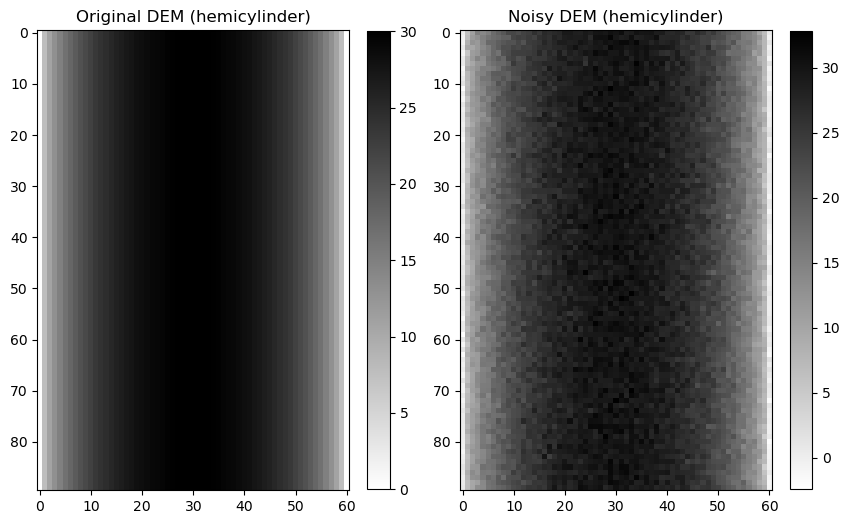

In [36]:
#Vis
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM (hemicylinder)')
plt.imshow(arr_c, cmap='binary')
plt.colorbar(fraction=0.065)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM (hemicylinder)')
plt.imshow(arr_cn, cmap='binary')
plt.colorbar(fraction=0.065)
plt.show()

In [39]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_c

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\hemicylinder_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
data = arr_cn
    
with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\hemicylinder_noisy.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)

In [46]:
#hyperbolic paraboloid
# z = (x**2 / a**2) - (y**2 / b**2)

a1 = 50
b1 = 25

arr_hp = np.zeros((int(2*a1)+1, int(2*a1)+1), dtype = 'float')
nrows = arr_hp.shape[0]
ncols = arr_hp.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = (x**2 / a1**2) - (y**2 / b1**2)
            arr_hp[x][y] = z
        except ValueError:
            pass

#arr_hp

In [47]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_hpn = arr_hp + arr_n
#arr_hpn

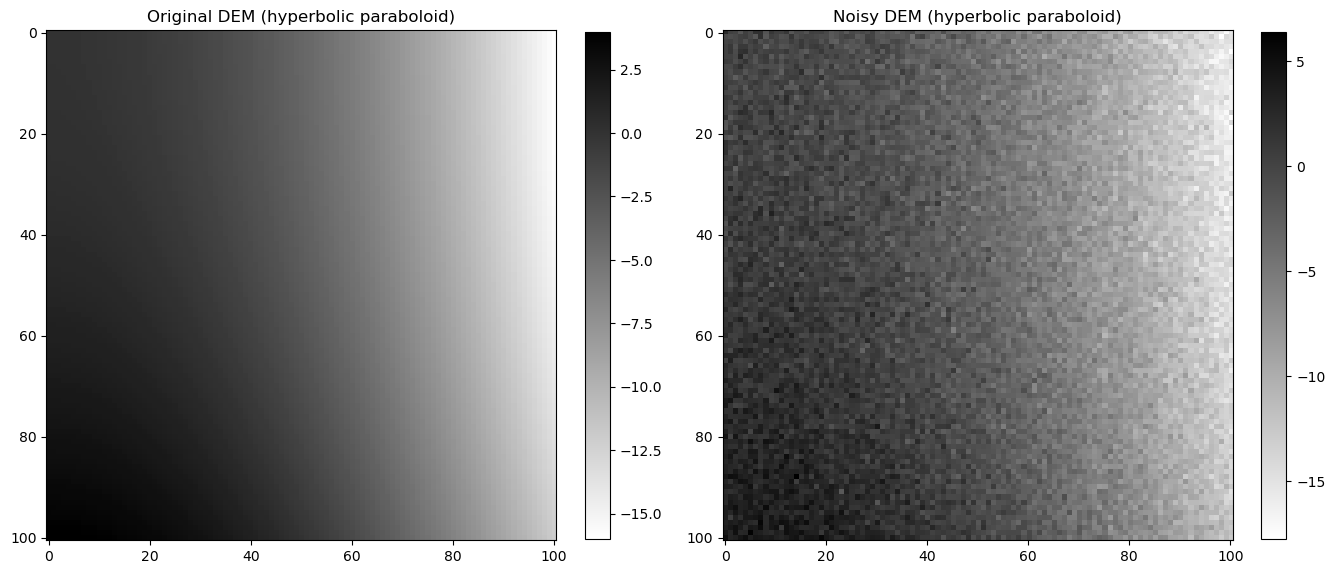

In [48]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM (hyperbolic paraboloid)')
plt.imshow(arr_hp, cmap='binary')
plt.colorbar(fraction=0.045)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM (hyperbolic paraboloid)')
plt.imshow(arr_hpn, cmap='binary')
plt.colorbar(fraction=0.045)
plt.show()

In [49]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_hp

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\paraboloid_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
data = arr_hpn
    
with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\paraboloid_noisy.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)

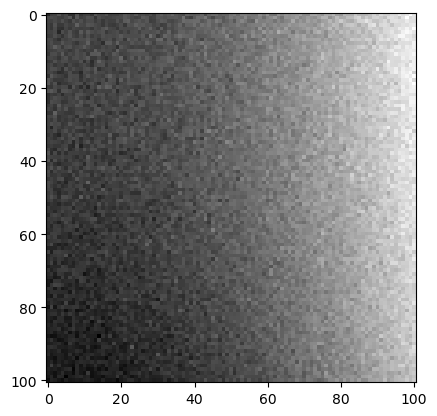

In [50]:
# Checking if the raster is saved correctly
with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\paraboloid_noisy.tif", 'r') as ds:
    arr = ds.read()
    
plt.imshow(arr[0], cmap='binary')
plt.show()